# importations of Libraries

In [200]:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   
import warnings
warnings.filterwarnings('ignore')

# 1. Loading the data

In [201]:
df=pd.read_csv('fullStudy.csv')

# Viewing the first few rows
df.head()

,Timestamp,Informed Consent options,Have you fully understood the purpose of this survey and how your information will be handled?,What gender do you identify as?,What is your age?,What is the highest level of education you have completed?,What is your current work status?,How do you pay for the majority of your medical expenses?,What is your average monthly household income?,"The hospital should have modern, up-to-date equipment","The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees should be well-dressed and have a neat and professional appearance,Materials associated with the service should be visually appealing,"When a hospital employee promises to do something by a particular time, they should do it","When a patient has a problem, the hospital's employees should show a sincere interest in solving it",The hospital should provide its services at the time it promises to do,The hospital should always get things right the first time,The hospital should maintain accurate and error-free records,The hospital's employees should tell the patient exactly when services will be performed,The hospital's employees should provide prompt service to patients,The hospital's employees should always be willing to help patients,The hospital's employees should never be too busy to respond to patients' requests,The behaviour and attitudes of hospital employees should instill confidence in patients,Patients should feel safe in all their dealings with the hospital and its employees,Hospital employees should be consistently courteous to patients,Hospital employees should be knowledgeable and able to answer patients' questions,The hospital should give each patient individualised attention,The hospital's employees should express care in their interaction with patients,The hospital and its employees should have the patients' best interests at heart,The hospital's employees should understand the specific needs of each of their patients,The operating hours of the hospital should be convenient for all its patients,"The hospital has modern, up-to-date equipment","The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees are well-dressed and have a neat and professional appearance,Materials associated with the service are visually appealing,"When a hospital employee promises to do something by a particular time, they do it","When a patient has a problem, the hospital's employees show a sincere interest in solving it",The hospital provides its services at the time it promises to do,The hospital always gets things right the first time,The hospital maintains accurate and error-free records,The hospital's employees tell the patients exactly when services will be performed,The hospital's employees provide prompt service to patients,The hospital's employees are always willing to help patients,The hospital's employees are never too busy to respond to patients' requests,The behaviour and attitudes of hospital employees instill confidence in patients,Patients feel safe in all their dealings with the hospital and its employees,The hospital's employees are consistently courteous to patients,The hospital's employees are knowledgeable and able to answer patients' questions,The hospital gives each patient individualised attention,The hospital's employees express care in their interaction with patients,The hospital and its employees have the patients' best interests at heart,The hospital's employees understand the specific needs of each of their patients,The operating hours of the hospital are convenient for all its patients,Which feature is the most important to you?,"Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?",What can we do to improve your experience?
0,5/3/2024 1

## Data Understanding


In [202]:
# shape of the dataset
df.shape

(174, 56)

### Checking for Missing values

In [203]:
# Checking for missing values
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


### Checking for duplicated values

In [204]:
df.duplicated().sum()

0

## Common Functions

In [244]:

# Defining custom colors
colors = ['#15616D', '#A5C4D4', '#754668', '#FCB0B3', '#FBD87F']
def plotPieChart(categories, title, values):
    # categories = ["Bachelor's Degree","Prefer not to say", "Certificate or Diploma", "Postgraduate Degree","Secondary Education"]
    # Plot the pie chart
    plt.figure(figsize=(7, 7))  # Adjust the figure size if needed
    plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90,colors=colors,  wedgeprops={'edgecolor': 'black'})
    plt.title(title,fontweight='bold', pad=30)
    # Adjusting the subplot parameters to add space at the top
    plt.subplots_adjust(top=0.95)  # Adjust this value as needed
    plt.axis('equal')


def plotbBarGraph(categories, title, values, xlabel, ylabel, isHorizontal=False):  

    # Plotting the bar chart
    plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
    total = values.sum()
    percentages = (values / total) * 100
    if isHorizontal == False :
        bars = plt.bar(categories, values, color=colors)
    else:
        bars = plt.barh(categories, values, color=colors)

        # Inverting the y-axis to have the highest count on top
        plt.gca().invert_yaxis()


    # Adding the values on top of the bars
    for bar, percent in zip(bars, percentages):
        height = bar.get_height()
        width = bar.get_width()
        if isHorizontal == False:
            plt.text(bar.get_x() + width / 2.0, height, '%d' % int(height), ha='center', va='bottom')
        else: 
            plt.text(width, bar.get_y() + bar.get_height() / 2, f'{percent:.1f}%',
             ha='left', va='center', fontsize=9)
    # Setting the title and labels
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display the chart
    plt.show()

## Descriptive Statistics

In [206]:
# checking the data type
df.dtypes

Timestamp                                                                                                                                            object
Informed Consent options                                                                                                                             object
Have you fully understood the purpose of this survey and how your information will be handled?                                                       object
What gender do you identify as?                                                                                                                      object
What is your age?                                                                                                                                    object
What is the highest level of education you have completed?                                                                                           object
What is your current work status?                               

In [207]:
# Descriptive statistics for numerical data
df.describe()

,"Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?"
count,174.000000
mean,8.436782
std,2.006931
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [208]:
# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)

# Descriptive statistics for categorical data
df.describe(include='object')

,Timestamp,Informed Consent options,Have you fully understood the purpose of this survey and how your information will be handled?,What gender do you identify as?,What is your age?,What is the highest level of education you have completed?,What is your current work status?,How do you pay for the majority of your medical expenses?,What is your average monthly household income?,"The hospital should have modern, up-to-date equipment","The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees should be well-dressed and have a neat and professional appearance,Materials associated with the service should be visually appealing,"When a hospital employee promises to do something by a particular time, they should do it","When a patient has a problem, the hospital's employees should show a sincere interest in solving it",The hospital should provide its services at the time it promises to do,The hospital should always get things right the first time,The hospital should maintain accurate and error-free records,The hospital's employees should tell the patient exactly when services will be performed,The hospital's employees should provide prompt service to patients,The hospital's employees should always be willing to help patients,The hospital's employees should never be too busy to respond to patients' requests,The behaviour and attitudes of hospital employees should instill confidence in patients,Patients should feel safe in all their dealings with the hospital and its employees,Hospital employees should be consistently courteous to patients,Hospital employees should be knowledgeable and able to answer patients' questions,The hospital should give each patient individualised attention,The hospital's employees should express care in their interaction with patients,The hospital and its employees should have the patients' best interests at heart,The hospital's employees should understand the specific needs of each of their patients,The operating hours of the hospital should be convenient for all its patients,"The hospital has modern, up-to-date equipment","The hospital's physical facilities are clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)",The hospital's employees are well-dressed and have a neat and professional appearance,Materials associated with the service are visually appealing,"When a hospital employee promises to do something by a particular time, they do it","When a patient has a problem, the hospital's employees show a sincere interest in solving it",The hospital provides its services at the time it promises to do,The hospital always gets things right the first time,The hospital maintains accurate and error-free records,The hospital's employees tell the patients exactly when services will be performed,The hospital's employees provide prompt service to patients,The hospital's employees are always willing to help patients,The hospital's employees are never too busy to respond to patients' requests,The behaviour and attitudes of hospital employees instill confidence in patients,Patients feel safe in all their dealings with the hospital and its employees,The hospital's employees are consistently courteous to patients,The hospital's employees are knowledgeable and able to answer patients' questions,The hospital gives each patient individualised attention,The hospital's employees express care in their interaction with patients,The hospital and its employees have the patients' best interests at heart,The hospital's employees understand the specific needs of each of their patients,The operating hours of the hospital are convenient for all its patients,Which feature is the most important to you?,What can we do to improve your experience?
count,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,17

### Response Rate

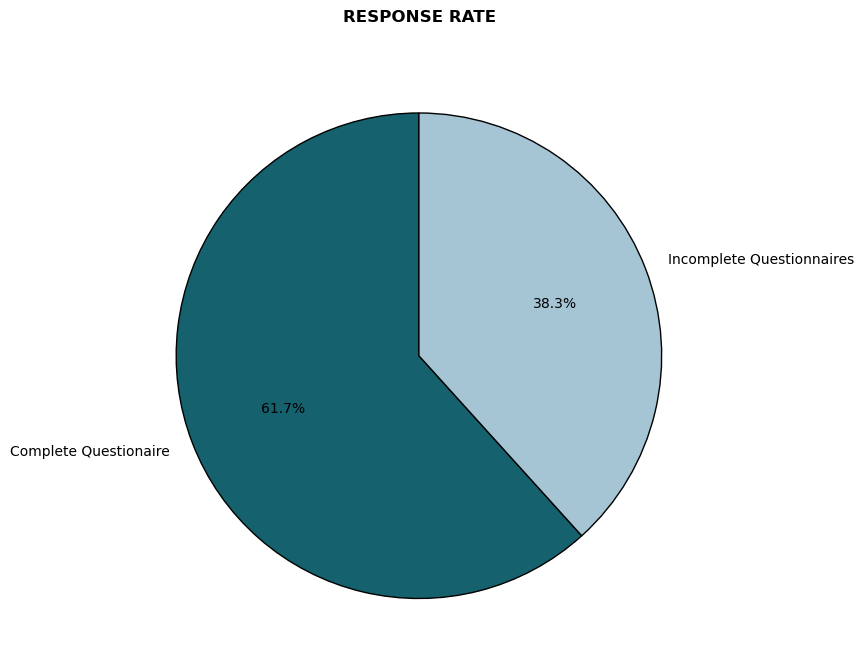

In [209]:
categories = ['Complete Questionaire','Incomplete Questionnaires']
values = [174, 108] 
title = 'RESPONSE RATE'
plotPieChart(categories, title, values)

In [210]:
df['What gender do you identify as?'].value_counts()

What gender do you identify as?
Male                 85
Female               84
Prefer not to say     4
Other                 1
Name: count, dtype: int64

### Based on Gender

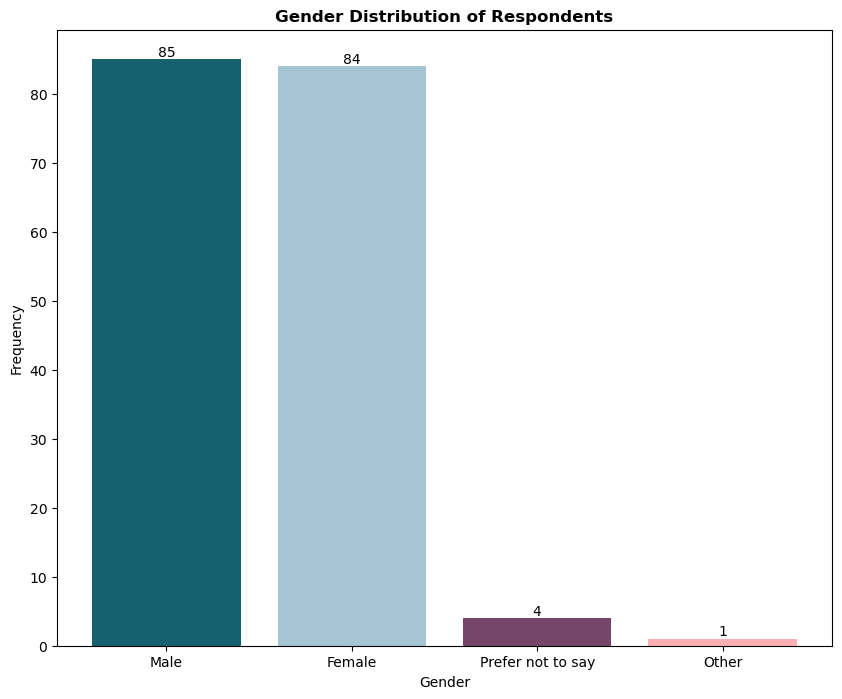

In [223]:
# Predefining your data
categories = ['Male', 'Female', 'Prefer not to say', 'Other']
values = [85, 84, 4, 1] 

# Setting the title and labels
title = 'Gender Distribution of Respondents'
xlabel = 'Gender'
ylabel = 'Frequency' 

plotbBarGraph(categories, title, values, xlabel, ylabel)

### Based on Age

In [212]:
df['What is your age?'].value_counts()

What is your age?
18 - 44              111
45-59                 52
Prefer not to say      9
> 60                   2
Name: count, dtype: int64

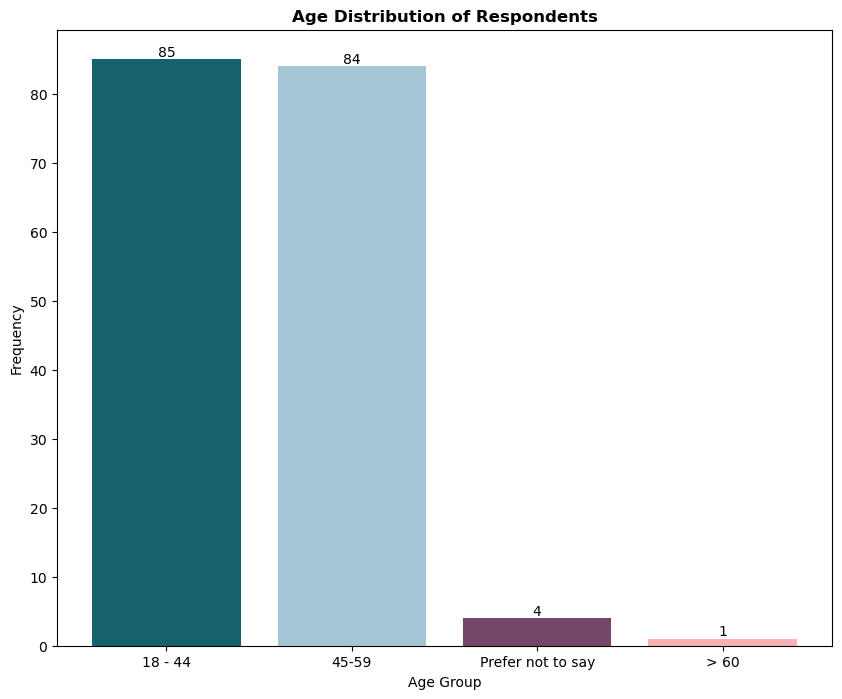

In [213]:
categories = ["18 - 44","45-59", "Prefer not to say", "> 60" ] 
title = 'Age Distribution of Respondents'# Suppose 'Education Level' is the column name containing education levels
age_counts = df['What is your age?'].value_counts() 
plotbBarGraph(categories,title,values, xlabel='Age Group', ylabel='Frequency')

### Based on Education

In [214]:
df["What is the highest level of education you have completed?"].value_counts()

What is the highest level of education you have completed?
Bachelor's Degree                                   85
Prefer not to say                                   30
Certificate or Diploma                              29
Postgraduate Degree ( Master's Degree or Higher)    21
Secondary Education                                  9
Name: count, dtype: int64

In [215]:
# Function to reduce the length of unique values
def reduce_length(value):
    if value.startswith('Postgraduate Degree'):
        return 'Postgraduate Degree'
    else:
        return value

# Apply the function to the 'Education Level' column
df['What is the highest level of education you have completed?'] = df['What is the highest level of education you have completed?'].apply(reduce_length)

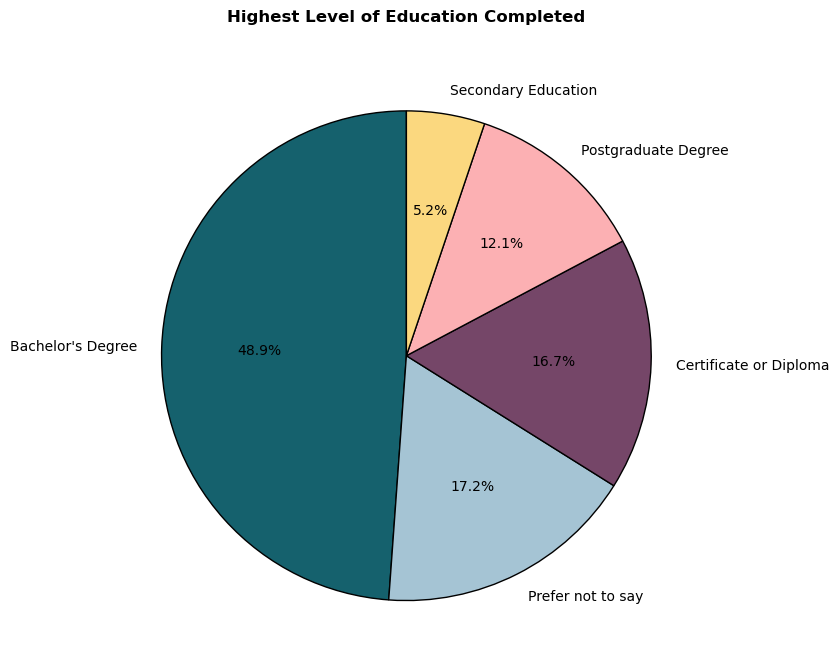

In [216]:
categories = ["Bachelor's Degree","Prefer not to say", "Certificate or Diploma", "Postgraduate Degree","Secondary Education"] 
title = 'Highest Level of Education Completed'# Suppose 'Education Level' is the column name containing education levels
education_counts = df['What is the highest level of education you have completed?'].value_counts()
plotPieChart(categories, title,education_counts )

### Based on Workstatus

In [217]:
work_counts = df['What is your current work status?'].value_counts()
work_counts

What is your current work status?
Employed             102
Self-Employed         36
Prefer not to say     16
Unemployed            16
Retired                4
Name: count, dtype: int64

In [218]:
#  df['What is your current work status?'].unique()

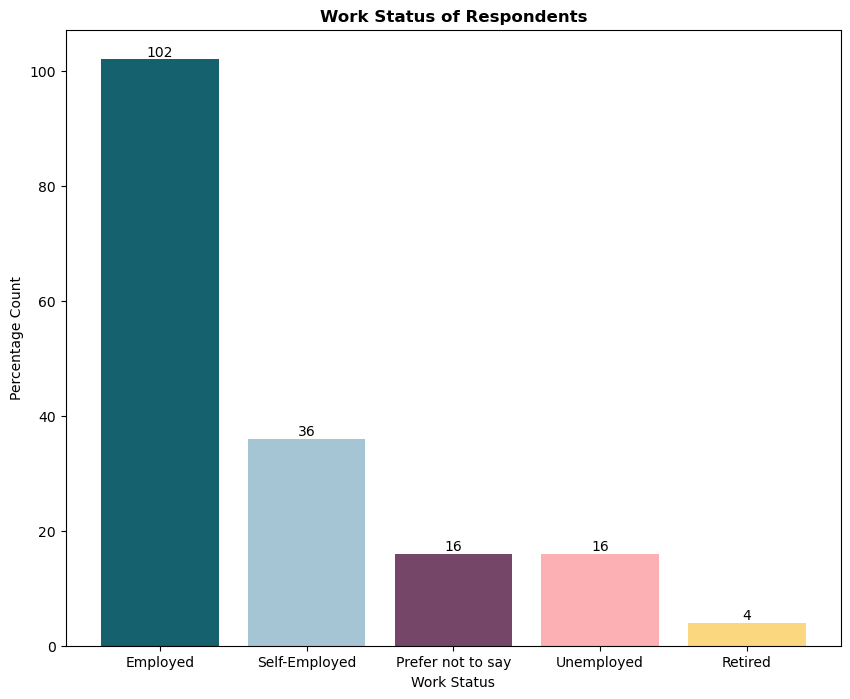

In [219]:
categories = ['Employed','Self-Employed',  'Prefer not to say','Unemployed', 'Retired'] 
title = 'Work Status of Respondents' 
plotbBarGraph(categories,title, work_counts, xlabel='Work Status', ylabel='Percentage Count')

### Based on Mode of payment for healthcare services

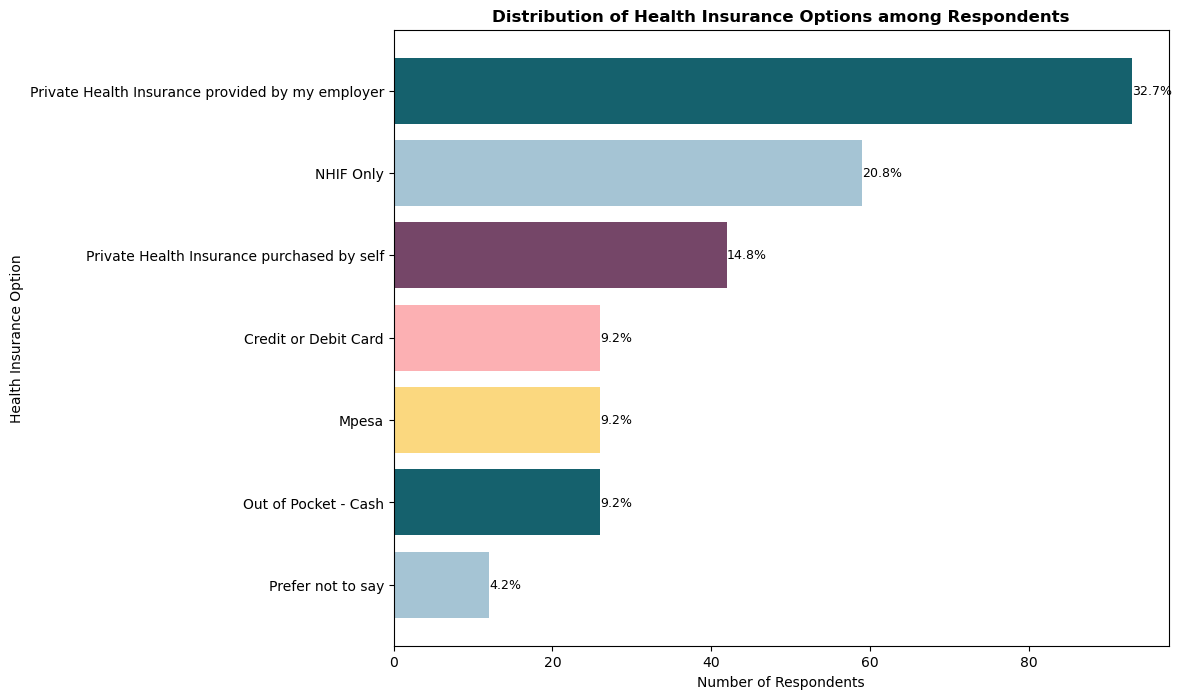

In [246]:
# Suppose 'Education Level' is the column name containing education levels
payment_counts = df['How do you pay for the majority of your medical expenses?'].value_counts()
payment_counts

# combining the inputs for users that selcted more than one choice
# Creating a DataFrame
# payment_counts = pd.DataFrame(payment_counts)

# Splitting the responses into individual selections
# df_payment_counts = payment_counts.assign(Responses=payment_counts.str.split(',')).explode('Responses')
# Sample data as a dictionary
data = {
    'Responses': [
        'Private Health Insurance provided by my employer',
        'NHIF Only, Private Health Insurance purchased by self',
        'NHIF Only',
        'Out of Pocket - Cash,Mpesa,Credit or Debit Card',
        'Prefer not to say',
        'NHIF Only, Private Health Insurance provided by my employer',
        'Private Health Insurance purchased by self',
        'Out of Pocket - Cash,Mpesa,Credit or Debit Card, NHIF Only',
        'NHIF Only, Private Health Insurance provided by my employer, Private Health Insurance purchased by self',
        'Out of Pocket - Cash,Mpesa,Credit or Debit Card, Private Health Insurance purchased by self',
        'Out of Pocket - Cash,Mpesa,Credit or Debit Card, Private Health Insurance provided by my employer',
        'Private Health Insurance provided by my employer, Private Health Insurance purchased by self',
        'Private Health Insurance provided by my employer, NHIF Only',
        'NHIF Only'
    ],
    'Counts': [
        70, 21, 15, 14, 12, 10, 9, 5, 5, 4, 3, 3, 2, 1
    ]
}

# Creating a DataFrame
df2 = pd.DataFrame(data)

# Splitting the responses into individual selections and exploding the DataFrame
df_exploded = df2.assign(Responses=df2['Responses'].str.split(',')).explode('Responses')

# Removing leading and trailing whitespace from responses
df_exploded['Responses'] = df_exploded['Responses'].str.strip()

# Counting the occurrences of each selection
counts = df_exploded.groupby('Responses')['Counts'].sum().reset_index()

# Sorting by count for better visualization
counts = counts.sort_values(by='Counts', ascending=False)

# Plotting the bar chart
# plt.figure(figsize=(10, 6))

plotbBarGraph(categories=counts['Responses'], values=counts['Counts'], title='Distribution of Health Insurance Options among Respondents',xlabel='Number of Respondents',ylabel='Health Insurance Option', isHorizontal=True)
# plt.barh(counts['Responses'], counts['Counts'], color='#15616D')
  

### Based Income

In [228]:
#Suppose 'Education Level' is the column name containing education levels
income_counts = df['What is your average monthly household income?'].value_counts()
income_counts


What is your average monthly household income?
Prefer not to say    79
50,000-99,999        37
49,999 and below     23
100,000-149,999      19
150,000 and above    16
Name: count, dtype: int64

In [230]:
df['What is your average monthly household income?'].unique()

array(['Prefer not to say', '50,000-99,999', '100,000-149,999',
       '150,000 and above', '49,999 and below'], dtype=object)

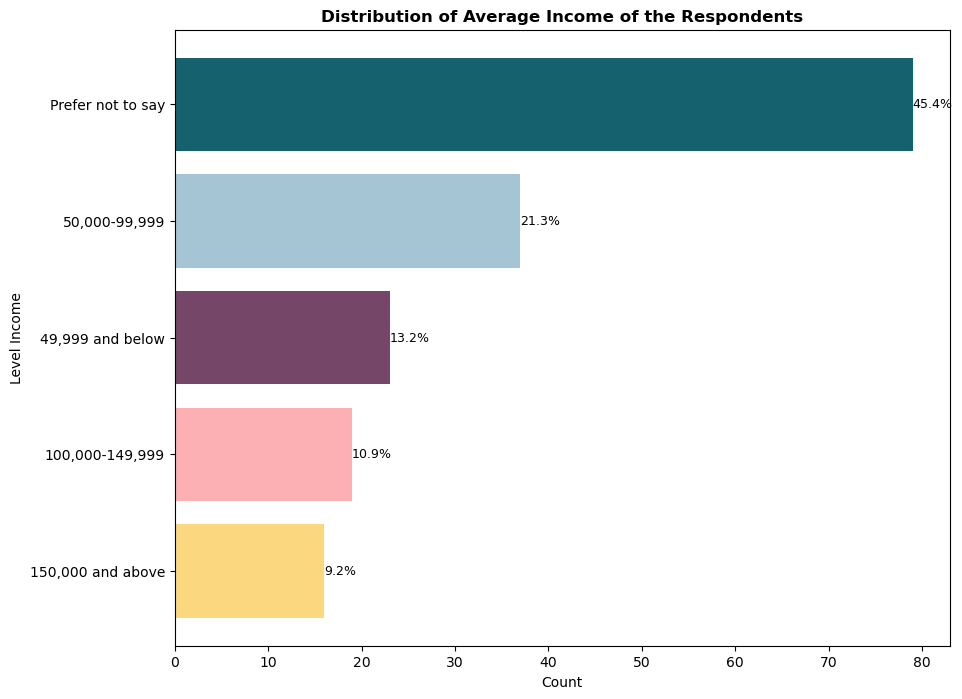

In [245]:

# categories
categories = ['Prefer not to say', '50,000-99,999', '49,999 and below', '100,000-149,999', '150,000 and above']
# Sort the data by counts in descending order
income_counts = income_counts.sort_values(ascending=False)

plotbBarGraph(categories=categories, values=income_counts, title='Distribution of Average Income of the Respondents',xlabel='Count',ylabel='Level Income', isHorizontal=True)
 